# SVM w/RBF Kernel Analysis for Problem #1

## Influence of Gamma Parameter

In [31]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

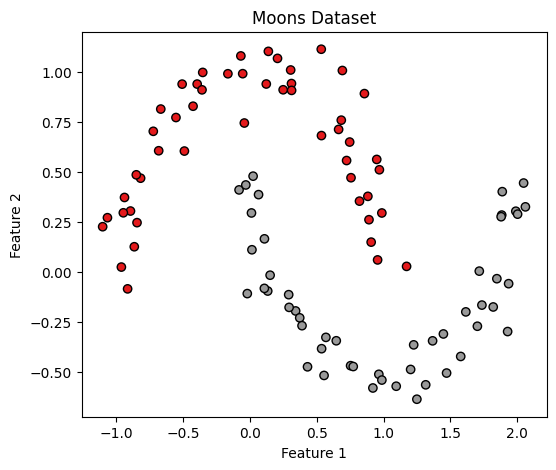

In [32]:
# Generate a synthetic dataset
X, y = datasets.make_moons(n_samples=100, noise=0.1, random_state=0)

# Plot the dataset
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolors="k")
plt.title("Moons Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [33]:
# Train SVM with a high gamma value
svm_high_gamma = SVC(kernel='rbf', gamma=100)
svm_high_gamma.fit(X, y)

# Train SVM with a moderate gamma value
svm_moderate_gamma = SVC(kernel='rbf', gamma=1)
svm_moderate_gamma.fit(X, y)

# Train SVM with a low gamma value
svm_low_gamma = SVC(kernel = "rbf", gamma = 1e-6)
svm_low_gamma.fit(X, y)

SVC(gamma=1e-06)

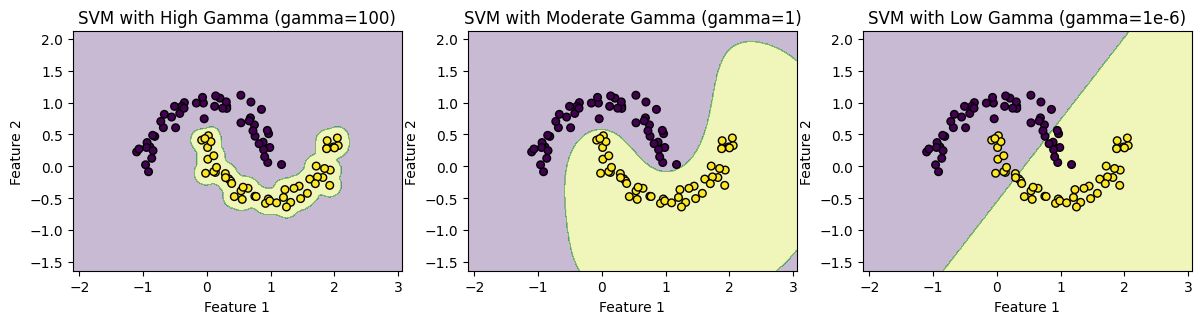

In [34]:
# Plot decision boundary
# model: Fitted SVM Model
#X: n_samples x 2
#y: (n_samples,)
def plot_decision_boundary(model, X, y, title):
    # Create a grid to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.gca().set_aspect('equal', adjustable='box')


# Plot decision boundary for high gamma
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plot_decision_boundary(svm_high_gamma, X, y, 'SVM with High Gamma (gamma=100)')

# Plot decision boundary for low gamma
plt.subplot(1, 3, 2)
plot_decision_boundary(svm_moderate_gamma, X, y, 'SVM with Moderate Gamma (gamma=1)')

# Plot decision boundary for really low gamma
plt.subplot(1, 3, 3)
plot_decision_boundary(svm_low_gamma, X, y, 'SVM with Low Gamma (gamma=1e-6)')


plt.tight_layout()
plt.show()

## Test of 1 (b): Support Vectors of Soft Margin Classifier

Support Vector Classification:
SV index 1, Dual Coeff: 1.0: Within margin boundaries
SV index 2, Dual Coeff: 1.0: Within margin boundaries
SV index 6, Dual Coeff: 1.0: Misclassified
SV index 8, Dual Coeff: 0.009763811486659599: On the margin
SV index 33, Dual Coeff: 1.0: Within margin boundaries
SV index 41, Dual Coeff: 1.0: Within margin boundaries
SV index 12, Dual Coeff: 1.0: Within margin boundaries
SV index 15, Dual Coeff: 0.9408008111733487: On the margin
SV index 20, Dual Coeff: 0.06896300031331072: On the margin
SV index 23, Dual Coeff: 1.0: Within margin boundaries
SV index 29, Dual Coeff: 1.0: Within margin boundaries
SV index 46, Dual Coeff: 1.0: Within margin boundaries


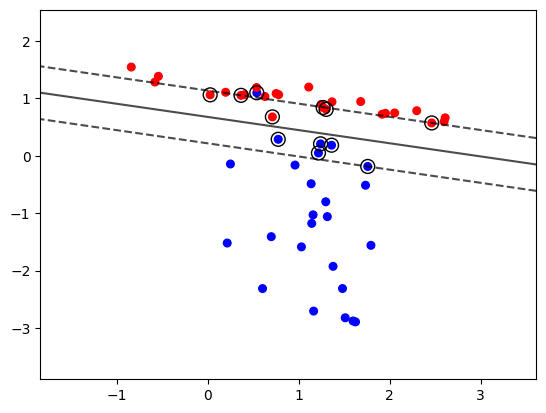

In [35]:
# Generate data
X, y = datasets.make_classification(
    n_samples=50, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.0, random_state=42
)

# Soft-margin SVM
C = 1.0
clf = SVC(kernel="linear", C=C)
clf.fit(X, y)

# Get support vectors and indices
support_vectors = clf.support_vectors_ # ndarray of shape (n_SV, n_features)
dual_coefs = clf.dual_coef_[0] # Dual coefficients of the support vector
support_indices = clf.support_ # Indices of Support Vectors: (n_SV)

# Function to classify type of support vector
def classify_sv(x, y_true, coef, intercept, alpha, C):
    margin = y_true * (np.dot(coef, x) + intercept)
    if 0 < abs(alpha) < C:
        return "On the margin"
    elif abs(alpha) == C:
        if margin < 1:  # Inside margin or misclassified
            if margin <= 0:
                return "Misclassified"
            else:
                return "Within margin boundaries"
    return "Error (shouldn't happen)"

# Print classification for each support vector
w = clf.coef_[0]
b = clf.intercept_[0]

print("Support Vector Classification:")
for idx, sv, alpha in zip(support_indices, support_vectors, dual_coefs):
    label = y[idx]
    category = classify_sv(sv, 1 if label == 1 else -1, w, b, alpha, C)
    print(f"SV index {idx}, Dual Coeff: {np.abs(alpha)}: {category}")

# Optional: plot decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, s=30)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1],
            s=100, facecolors='none', edgecolors='k')

# Decision boundary
xx = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 50)
yy = np.linspace(X[:,1].min()-1, X[:,1].max()+1, 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

plt.contour(XX, YY, Z, colors='k',
            levels=[-1, 0, 1], alpha=0.7,
            linestyles=['--', '-', '--'])
plt.show()
